In [48]:
import pandas as pd
import scipy.optimize as opt;

Df = pd.read_csv("../../membershipchainservice/Data/gentree-node_0-epoch4")
Df

,Name,Level,X,Y,cluster,bunch
0,node_0,0,40.309273,254.230121,map[],map[node_6:true node_7:true node_8:true]
1,node_1,0,12.738331,12.786366,map[],map[node_3:true node_4:true node_6:true node_7...
2,node_2,0,276.934520,17.296413,map[node_5:true],map[node_6:true node_7:true node_8:true node_9...
3,node_3,1,47.887657,158.214120,map[node_1:true node_4:true],map[node_4:true node_6:true node_7:true node_8...
4,node_4,1,60.255903,98.322212,map[node_1:true node_3:true],map[node_3:true node_6:true node_7:true node_8...
5,node_5,0,270.793763,162.751702,map[],map[node_2:true node_6:true node_7:true node_8...
6,node_6,2,228.684025,0.631816,map[node_0:true node_1:true node_2:true node_3...,map[node_7:true node_8:true]
7,node_7,2,133.616158,216.462010,map[node_0:true node_1:true node_2:true node_3...,map[node_6:true node_8:true]
8,node_8,2,68.628666,283.581209,map[node_0:true node_1:true node_2:true node_3...,map[node_6:true node_7:true]
9,node_9,1,270.428237,9.176995,map[node_2:true],map[node_6:true node_7:true node_8:true]


In [49]:
cluster = Df["cluster"][1]
import re

regex = r"(node_[0-9]+)"
explode_list_lambda = lambda map_str : [m.group() for m in re.finditer(regex, map_str, re.MULTILINE)]
Df["cluster_list"] = Df["cluster"].apply(explode_list_lambda)
Df["bunch_list"] = Df["bunch"].apply(explode_list_lambda)
Df

,Name,Level,X,Y,cluster,bunch,cluster_list,bunch_list
0,node_0,0,40.309273,254.230121,map[],map[node_6:true node_7:true node_8:true],[],"[node_6, node_7, node_8]"
1,node_1,0,12.738331,12.786366,map[],map[node_3:true node_4:true node_6:true node_7...,[],"[node_3, node_4, node_6, node_7, node_8]"
2,node_2,0,276.934520,17.296413,map[node_5:true],map[node_6:true node_7:true node_8:true node_9...,[node_5],"[node_6, node_7, node_8, node_9]"
3,node_3,1,47.887657,158.214120,map[node_1:true node_4:true],map[node_4:true node_6:true node_7:true node_8...,"[node_1, node_4]","[node_4, node_6, node_7, node_8]"
4,node_4,1,60.255903,98.322212,map[node_1:true node_3:true],map[node_3:true node_6:true node_7:true node_8...,"[node_1, node_3]","[node_3, node_6, node_7, node_8]"
5,node_5,0,270.793763,162.751702,map[],map[node_2:true node_6:true node_7:true node_8...,[],"[node_2, node_6, node_7, node_8]"
6,node_6,2,228.684025,0.631816,map[node_0:true node_1:true node_2:true node_3...,map[node_7:true node_8:true],"[node_0, node_1, node_2, node_3, node_4, node_...","[node_7, node_8]"
7,node_7,2,133.616158,216.462010,map[node_0:true node_1:true node_2:true node_3...,map[node_6:true node_8:true],"[node_0, node_1, node_2, node_3, node_4, node_...","[node_6, node_8]"
8,node_8,2,68.628666,283.581209,map[node_0:true node_1:true node_2:true node_3...,map[node_6:true node_7:true],"[node_0, node_1, node_2, node_3, node_4, node_...","[node_6, node_7]"
9,node_9,1,270.428237,9.176995,map[node_2:true],map[node_6:true node_7:true node_8:true],[node_2],"[node_6, node_7, node_8]"


In [50]:
def cover_cluster(radius, name, Df):
    node = Df[Df["Name"]==name]
    cl = list(Df[Df["Name"]==name].cluster_list)[0]
    if len(cl) == 0:
        return True
    
    distance_lambda = lambda row : np.sqrt((row.X-node.X)**2 + (row.Y-node.Y)**2)
    distances = Df[Df["Name"].isin(cl)].apply(distance_lambda, axis=1)
    if radius < distances.max().values[0]:
        return False
    
    return True
    
def compute_radius(name, Df, base):
    radius = base
    while not cover_cluster(radius, name, Df):
        radius *= 2
        
    print(name, radius)
    return radius

In [51]:
palette = [
    [64/255, 64/255, 122/255,1.0],
    [255/255, 121/255, 63/255,1.0],
    [255/255, 177/255, 66/255,1.0],
    [52/255, 172/255, 224/255,1.0],
    
]

node_0 16
node_1 16
node_2 256
node_3 256
node_4 128
node_5 16
node_6 512
node_7 256
node_8 512
node_9 16


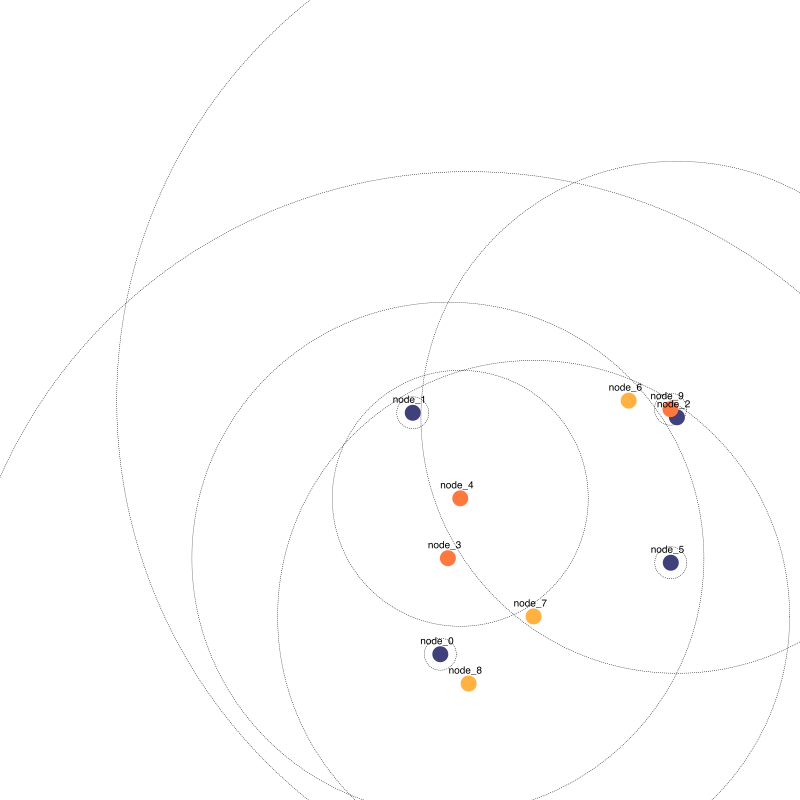

In [52]:
from io import BytesIO
import numpy as np
import cairo
import IPython.display

svgio = BytesIO()
side = 800

with cairo.SVGSurface(svgio, side, side) as surface:
    context = cairo.Context(surface)
    #context.scale(0.3,0.3)
    context.translate(side/2, side/2)
    
    context.set_source_rgba(0,0,0,1)
    context.set_dash([1.0])
    context.set_line_width(0.5)
    for row in Df.iterrows():
        Name, Level, X, Y, cluster, bunch, cluster_list, bunch_list = row[1]
        context.arc(X, Y, compute_radius(Name, Df, 16), 0, 2*np.pi)
        context.stroke()
        
    for row in Df.iterrows():
        Name, Level, X, Y, cluster, bunch, cluster_list, bunch_list = row[1]
        context.set_source_rgba(*palette[Level])
        context.arc(X, Y, 8, 0, 2*np.pi)
        context.fill()
    
    context.set_source_rgba(0,0,0,1)
    for row in Df.iterrows():
        Name, Level, X, Y, cluster, bunch, cluster_list, bunch_list = row[1]
        context.move_to(X-20,Y-10)
        context.show_text(Name)
        context.stroke()
    
    
    
IPython.display.SVG(data=svgio.getvalue())

In [11]:
node = Df[Df["Name"]=="node_0"]
cl = list(Df[Df["Name"]=="node_0"].cluster_list)[0]

distance_lambda = lambda row : np.sqrt((row.X-node.X)**2 + (row.Y-node.Y)**2)
Df[Df["Name"].isin(cl)].apply(distance_lambda, axis=1)

,0
1,291.643810
2,153.189385
3,219.441565
